<a href="https://colab.research.google.com/github/willisg25/Stat24/blob/main/Willis_Lab_10_Linear_Auto_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [2]:
!pip install wandb
import wandb as wb

In [3]:
def plot(x): #defines plot if 2D array or data x
    if type(x) == torch.Tensor : #checks if x is a pytorch tensor
        x = x.cpu().detach().numpy()  #if yes, the tensor is mooved to the cpu and made a standalone numpy array

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') #gray colormap
    ax.axis('off')
    fig.set_size_inches(5, 5) #size
    plt.show()

In [4]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0) #takes x and adds padding based on the dimensions of the array with constant value 0
    plot(montage(x))

In [5]:
b = 1000 #global variable set to 1000

def get_batch(mode): #sets up dictation of train or test mode
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) #random integer r which acts as the starting index for the batch in the training data
        x = X[r:r+b,:] #effectively makes sure the array x has b nuumber of samples
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [6]:
# #MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set  = MNIST('./data', train=False, download=True)

#KMNIST
train_set = KMNIST('./data', train=True, download=True)
test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

In [7]:
X = train_set.data.numpy() #retrieves the x input data from the train_set and converts it to a numpy array
X_test = test_set.data.numpy() #retrieves x the input data from the test_set and converts it to a numpy array
Y = train_set.targets.numpy() #retrieves the y input data from the train_set and converts it to a numpy array
Y_test = test_set.targets.numpy() #retrieves y the input data from the test_set and converts it to a numpy array

X = X[:,None,:,:]/255 #adds extra dimension to x and normalizes the data
X_test = X_test[:,None,:,:]/255#adds extra dimension to x test and normalizes the data

In [8]:
X.shape

(60000, 1, 28, 28)

In [9]:
Y[50000]

0

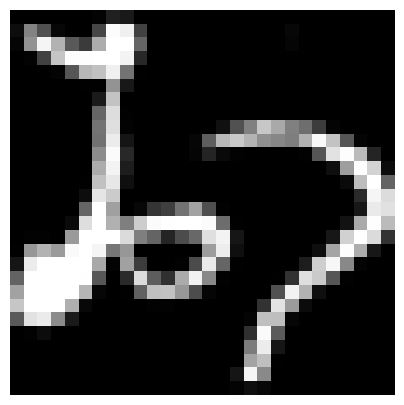

In [10]:
plot(X[50000,0,:,:])

In [11]:
Y[100]

0

In [12]:
X.shape

(60000, 1, 28, 28)

In [13]:
X[0:25,0,:,:].shape

(25, 28, 28)

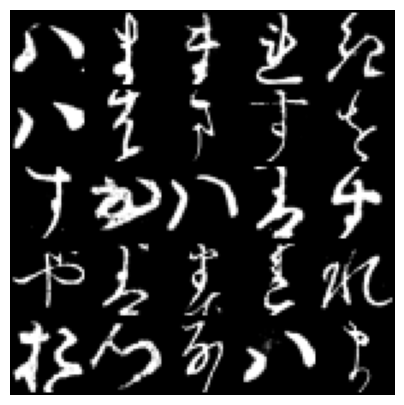

In [14]:
montage_plot(X[125:150,0,:,:])

In [15]:
X.shape[0]

60000

In [16]:
X_test.shape

(10000, 1, 28, 28)

In [17]:
X.shape[0]

60000

In [18]:
X_test.shape[0]

10000

In [19]:
def GPU(data): #converts data into pytorch tensor with gradient
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): #converts into pytorch tensor without gradient
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [20]:
X = GPU_data(X) #changes the arrays in order to be run by the gpu
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [21]:
X = X.reshape(X.shape[0],784) #sets the first dimension the same and the second dimension to 784
X_test = X_test.reshape(X_test.shape[0],784) #sets the first dimension the same and the second dimension to 784

In [22]:
X.shape

torch.Size([60000, 784])


### Classifier


In [23]:
x,y = get_batch('train')

In [24]:
x.shape

torch.Size([1000, 784])

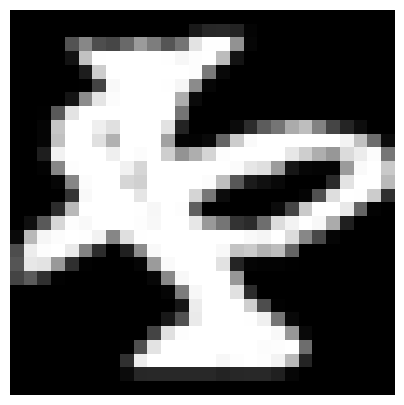

In [25]:
plot(x[0].reshape(28,28))

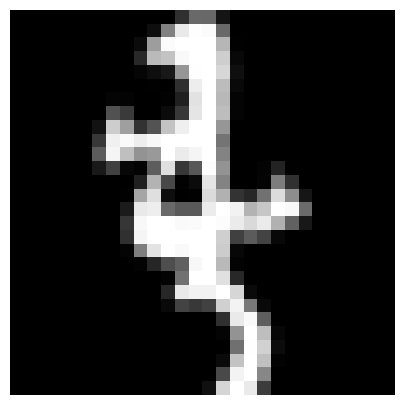

In [26]:
plot(x[1].reshape(28,28))

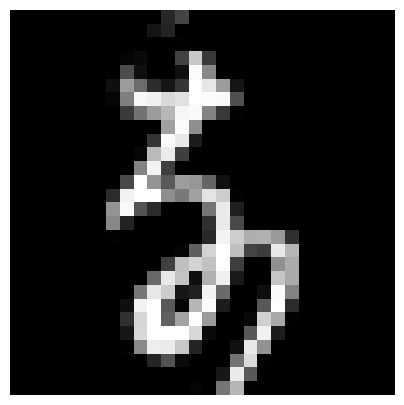

In [27]:
plot(x[2].reshape(28,28))

In [28]:
y[:10]

tensor([7., 6., 4., 4., 9., 5., 3., 4., 6., 0.], device='cuda:0')

In [29]:
W = GPU(np.random.randn(784,10))

In [30]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [31]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [32]:
(x@W).shape

torch.Size([1000, 10])

In [33]:
%%timeit
x@W

27.5 µs ± 6.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
x@W

tensor([[-22.7164,  10.6531, -23.9408,  ...,  10.9530,   4.7939, -22.4245],
        [  1.1254,   9.1648,  -6.7237,  ...,   3.9354,   9.6969, -17.5449],
        [ 10.4336,   7.1738,  -2.3793,  ...,   1.0553,  19.8073, -17.8021],
        ...,
        [-14.9644,   3.7059,   1.7167,  ...,  19.3249,  12.9885, -10.7519],
        [-15.7377,   2.3976,  -4.9390,  ...,  -0.6347,  31.2923, -25.0722],
        [ -1.9449,   6.8349,  -7.8289,  ...,  12.5485,  16.6968,  -9.4214]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [35]:
y2 = x@W

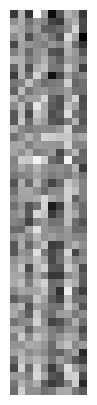

In [36]:
plot(y2[:50])

In [37]:
y

tensor([7., 6., 4., 4., 9., 5., 3., 4., 6., 0., 3., 3., 7., 7., 7., 6., 5., 7.,
        8., 4., 1., 6., 7., 8., 5., 9., 7., 6., 6., 3., 8., 6., 8., 7., 2., 3.,
        9., 6., 1., 0., 8., 2., 3., 5., 2., 3., 7., 4., 9., 0., 5., 3., 9., 6.,
        7., 2., 0., 3., 1., 0., 2., 8., 3., 7., 0., 6., 9., 8., 6., 0., 7., 0.,
        2., 7., 1., 6., 8., 0., 4., 2., 4., 9., 3., 5., 6., 9., 4., 9., 9., 7.,
        0., 0., 8., 0., 6., 2., 4., 9., 0., 9., 0., 2., 3., 6., 6., 1., 7., 4.,
        9., 9., 8., 7., 2., 5., 2., 3., 1., 3., 1., 5., 6., 8., 7., 0., 0., 2.,
        5., 9., 6., 3., 4., 6., 9., 2., 6., 4., 5., 7., 2., 5., 4., 9., 0., 4.,
        9., 0., 8., 5., 7., 5., 1., 0., 7., 5., 7., 3., 0., 3., 1., 8., 1., 7.,
        2., 8., 8., 1., 2., 2., 5., 2., 0., 8., 4., 3., 0., 3., 9., 4., 8., 7.,
        3., 1., 0., 6., 0., 3., 6., 3., 5., 8., 1., 3., 2., 9., 5., 8., 6., 1.,
        1., 9., 9., 9., 7., 2., 9., 3., 8., 1., 7., 2., 0., 8., 5., 8., 9., 5.,
        2., 8., 9., 5., 5., 9., 1., 4., 

In [38]:
y.shape

torch.Size([1000])

In [39]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [40]:
one_hot(y)

<ipython-input-19-951240ba67ce>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [41]:
torch.argmax(y2,1)

tensor([3, 8, 8, 7, 7, 7, 1, 7, 3, 7, 1, 4, 3, 7, 1, 7, 4, 7, 8, 7, 3, 3, 7, 7,
        4, 4, 3, 7, 3, 3, 4, 3, 3, 4, 1, 4, 7, 3, 7, 3, 3, 1, 1, 7, 1, 1, 7, 3,
        8, 1, 3, 3, 7, 8, 3, 3, 7, 4, 8, 7, 1, 8, 8, 7, 1, 8, 3, 9, 8, 4, 7, 7,
        8, 1, 4, 3, 1, 3, 3, 8, 7, 3, 7, 3, 7, 2, 8, 7, 0, 7, 2, 3, 8, 7, 7, 7,
        3, 3, 7, 8, 7, 1, 4, 7, 3, 8, 4, 3, 3, 8, 2, 1, 1, 4, 1, 4, 7, 1, 7, 3,
        8, 7, 3, 7, 3, 1, 3, 7, 1, 1, 7, 3, 3, 8, 7, 4, 2, 3, 8, 7, 3, 3, 2, 3,
        8, 3, 4, 8, 7, 4, 3, 3, 7, 7, 3, 3, 7, 7, 3, 8, 8, 3, 7, 3, 7, 3, 8, 4,
        4, 7, 7, 1, 3, 4, 3, 7, 1, 8, 7, 7, 4, 1, 7, 4, 7, 7, 3, 1, 3, 2, 8, 1,
        8, 4, 3, 2, 7, 8, 8, 3, 3, 3, 3, 4, 7, 8, 7, 3, 7, 4, 2, 7, 7, 7, 7, 3,
        8, 7, 7, 3, 3, 7, 3, 3, 7, 3, 7, 4, 3, 7, 7, 3, 8, 1, 7, 8, 7, 8, 3, 3,
        7, 8, 3, 3, 8, 8, 0, 3, 3, 8, 8, 8, 8, 8, 7, 7, 7, 4, 0, 7, 7, 8, 7, 3,
        4, 7, 4, 1, 7, 7, 8, 3, 7, 4, 7, 7, 4, 7, 7, 7, 1, 3, 7, 7, 4, 7, 1, 3,
        7, 8, 7, 3, 3, 3, 1, 3, 6, 3, 8,

In [42]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.1290, device='cuda:0')

In [43]:
X.shape

torch.Size([60000, 784])

In [44]:
X@W

tensor([[ -3.5373,   3.4265, -12.0906,  ...,   7.6586,   4.3772,  -2.7422],
        [ -2.8799,  17.2926,  13.4292,  ...,  17.2143,   5.2498, -18.0255],
        [-10.9849,   8.1878,  -0.7805,  ...,  27.9835,  -2.8573, -10.8945],
        ...,
        [-19.3705,  13.5415,  18.9834,  ...,  26.2860,   2.6368, -16.2223],
        [-11.2438,   8.1948,   3.8422,  ...,  10.5824,   8.9361, -16.6756],
        [  8.1191,   7.1947,   5.5493,  ...,   5.7510,  -5.7777, -13.1779]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [45]:
torch.argmax(X@W,1)

tensor([4, 1, 7,  ..., 7, 3, 0], device='cuda:0')

In [46]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [47]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.1108, device='cuda:0')

In [48]:
X@W

tensor([[ -3.5373,   3.4265, -12.0906,  ...,   7.6586,   4.3772,  -2.7422],
        [ -2.8799,  17.2926,  13.4292,  ...,  17.2143,   5.2498, -18.0255],
        [-10.9849,   8.1878,  -0.7805,  ...,  27.9835,  -2.8573, -10.8945],
        ...,
        [-19.3705,  13.5415,  18.9834,  ...,  26.2860,   2.6368, -16.2223],
        [-11.2438,   8.1948,   3.8422,  ...,  10.5824,   8.9361, -16.6756],
        [  8.1191,   7.1947,   5.5493,  ...,   5.7510,  -5.7777, -13.1779]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [49]:
W.shape

torch.Size([784, 10])

In [50]:
W[:,0].shape

torch.Size([784])

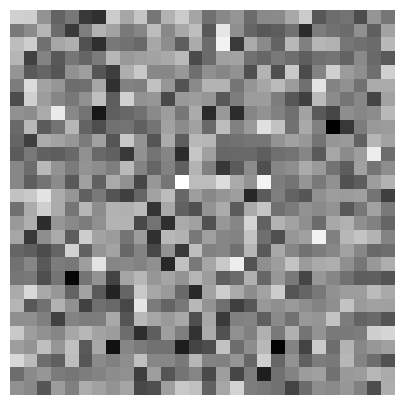

In [51]:
plot(W[:,0].reshape(28,28))

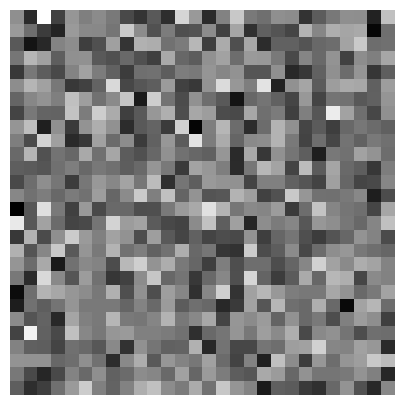

In [52]:
plot(W[:,2].reshape(28,28))

In [53]:
W.shape

torch.Size([784, 10])

In [54]:
(W.T).shape

torch.Size([10, 784])

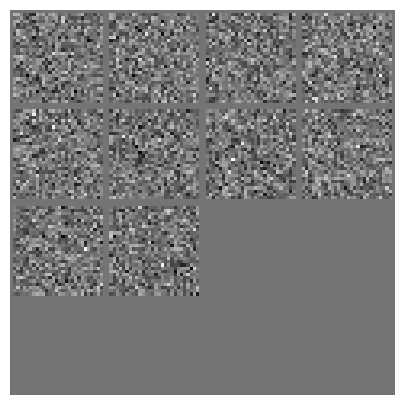

In [55]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [56]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [57]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [58]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [59]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [60]:
def model(x,w):

    return x@w[0]

In [61]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data #weights are updated by subtracting the product of the learning rate and the gradient from the current weight values

    w[0].grad.data.zero_() #stored gradient reset to zero

In [62]:
def make_plots():

    acc_train = acc(model(x,w),y) #computes the accuracy of  predictions (x,w) against the actual labels y

    xt,yt = get_batch('test') #batch of test data inputs xt and labels yt

    acc_test = acc(model(xt,w),yt) #accuracy of the model on the test dataset using the fetched test data

    wb.log({"acc_train": acc_train, "acc_test": acc_test}) #logs the training and test accuracy to wb

In [63]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2) #generates random samples u1 modified by scaling and shifting
    u2 = torch.rand(size) #second set of random samples with a standard uniform distribution ranging from 0 to 1
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

wandb: Currently logged in as: gawillis03 (willisg). Use `wandb login --relogin` to force relogin


<ipython-input-19-951240ba67ce>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


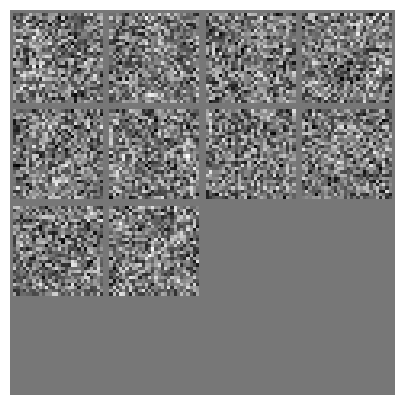

acc_test,▁▁▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇█▇▇████
acc_train,▁▁▁▂▃▃▃▃▄▃▄▄▄▄▄▅▅▆▅▆▆▆▆▇▇▇▇▇▇█▇▇▇██▇▇███
acc_test,0.38867
acc_train,0.49707


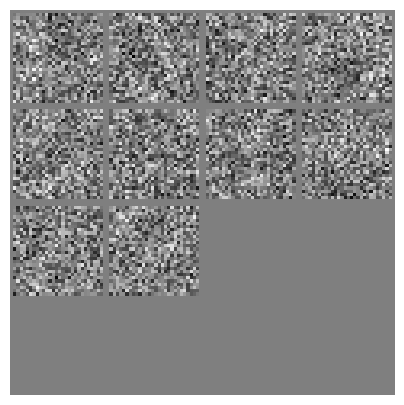

acc_test,▁▁▁▂▂▃▃▄▄▄▅▅▅▅▆▆▆▆▆▇▇▆▆▇▇▇█▇▇█▇▇█▇██████
acc_train,▁▂▂▂▃▃▃▄▄▅▅▅▅▆▆▆▆▆▇▆▇▇▆▆▇▇▇▇▇█▇▇▇▇▇███▇█
acc_test,0.5
acc_train,0.58984


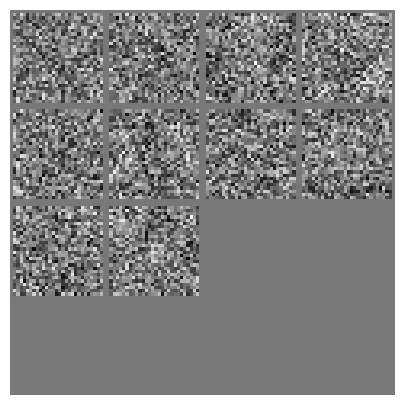

In [64]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123"); #initializes a wb project for tracking
    c = wb.config

    c.L = 0.1 #parameters for the learning rate, batch size, and number of epochs
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))] #weights with a truncated normal distribution

    for i in range(c.epochs): #perform training over the specified number of epochs

        x,y = get_batch('train')

        out = model(x,w) #creates output for inputs

        loss = cross_entropy(softmax(out),y) #gradients of the loss based on weights

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy()) #montage plot of the weights reshaped and visualized as images for evvery 10000 epochs

acc_test,▁▁▂▄▄▄▅▄▅▅▆▅▆▆▅▅▅▅▇▆▇▇▆▆▆▇▇▆▆▆▇▇▆███▇█▇█
acc_train,▁▂▂▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▆▆▇▇▇▇▇▇█▇█▇▇█▇▇▇███▇
acc_test,0.29102
acc_train,0.41504


<ipython-input-19-951240ba67ce>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


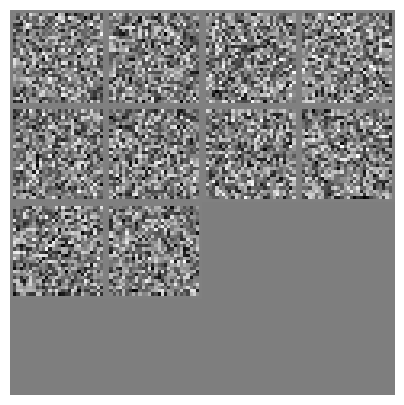

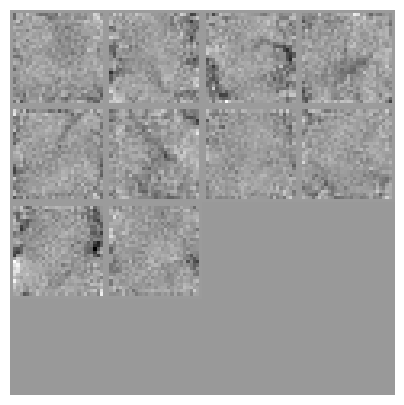

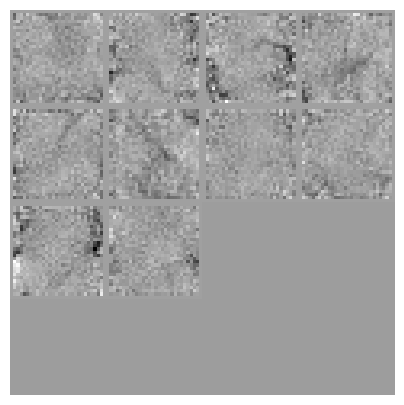

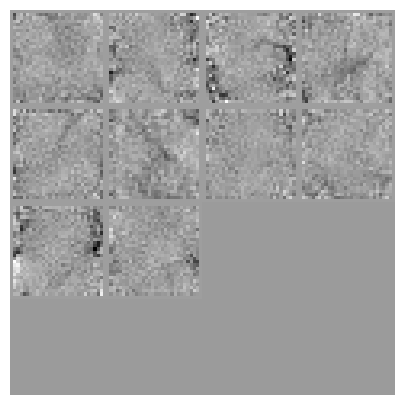

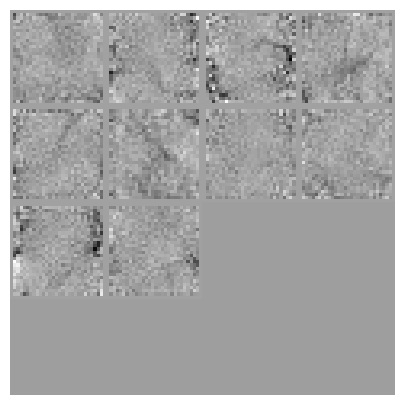

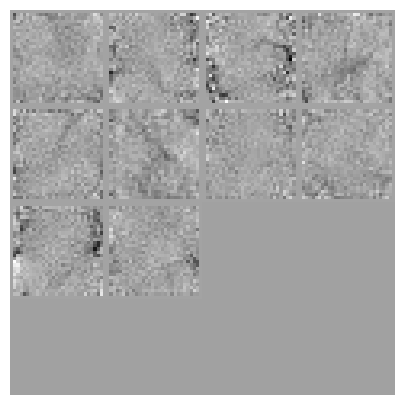

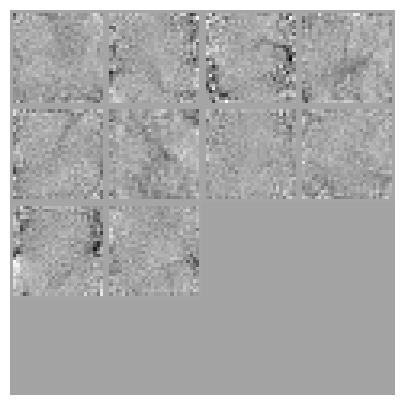

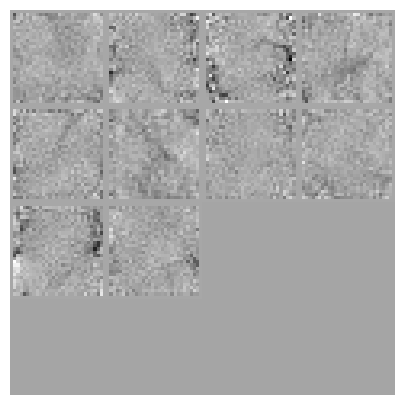

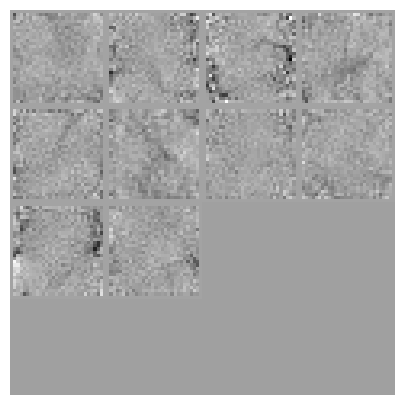

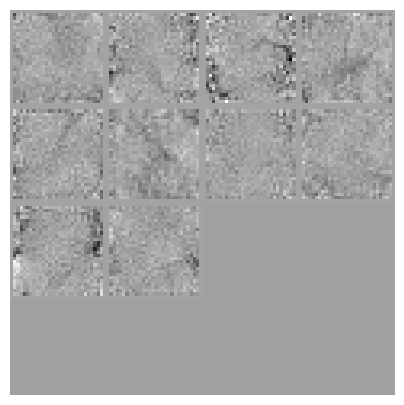

acc_test,▂▃▄▅▅▄▄▄█▁▂▂▂▃▁▂▃▁▄▄▃▆▆▁▃▄▁▄▄▂▂▄▆▄▂▅▂▃▁▁
acc_train,▁▄▅▄▆▄▃▅▅▄█▆▃▇▅▇▅▆▅▅▅▇▄▅▅▄▆▃▅▅▆▅▄▄▃▆▅▄▃▃
loss,█▅▄▅▃▅▅▄▄▅▁▃▅▂▃▂▄▃▄▄▃▂▄▃▄▄▃▅▄▄▃▃▅▅▅▃▄▄▆▆
acc_test,0.63379
acc_train,0.86523
loss,1.59553


<ipython-input-19-951240ba67ce>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


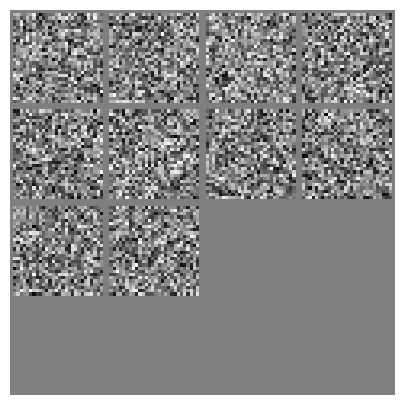

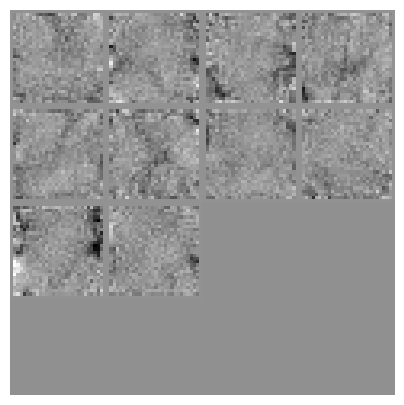

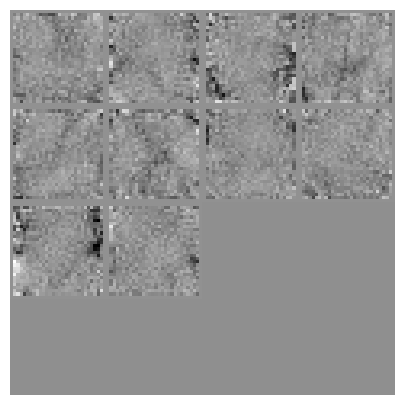

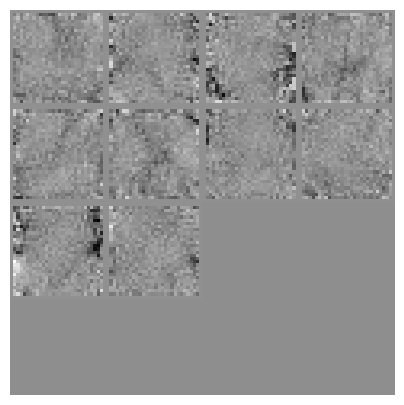

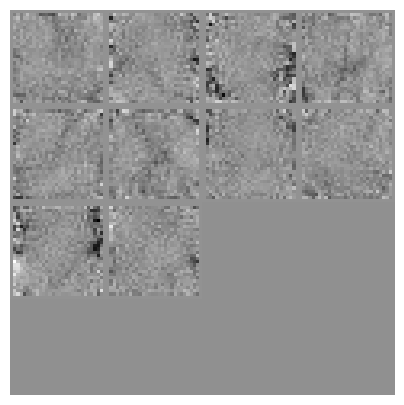

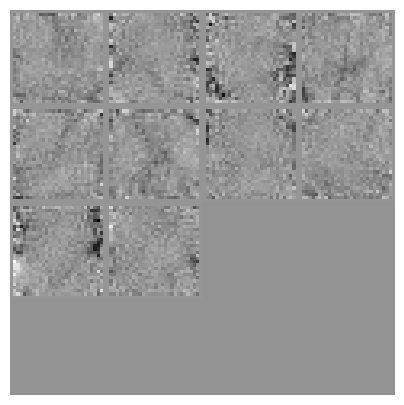

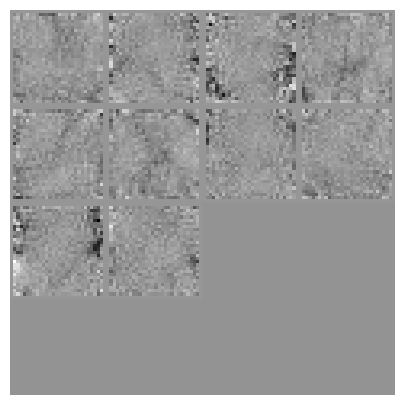

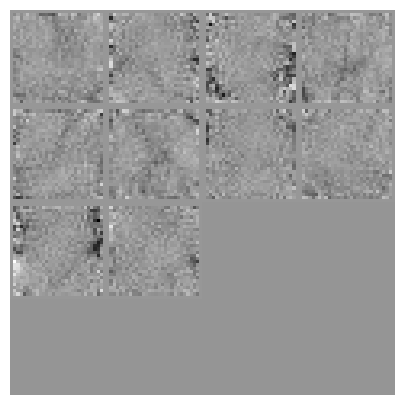

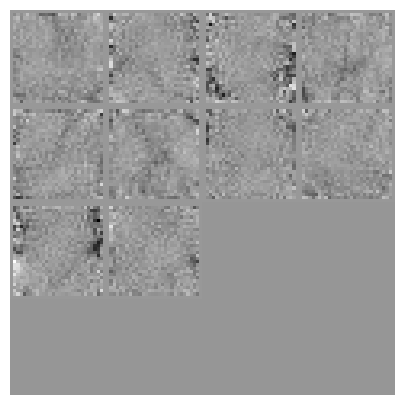

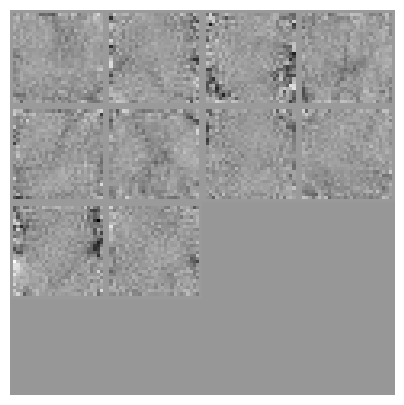

acc_test,▁▁▇▇▇▇▆▆▆▇▇▇█▇▇▇▇▇█▆▆▆▇▆▇▆▆▆▇▇▆▇▇▆▆█▇▆▇▇
acc_train,▁▂▆▇▇▇▇▇▇█████▇▇█▇▇▇▇█▇█▇█▇▆▇██▇█▇█▇▇███
loss,█▇▃▂▂▂▂▂▂▁▁▁▁▁▂▂▁▂▂▂▂▁▂▁▂▁▂▃▂▁▁▂▁▂▁▂▂▁▁▁
acc_test,0.64844
acc_train,0.88379
loss,1.57704


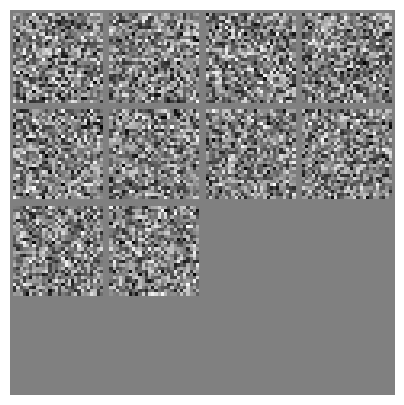

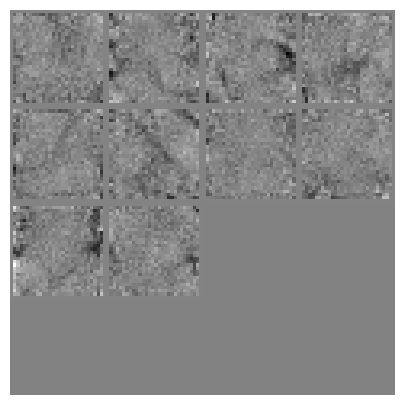

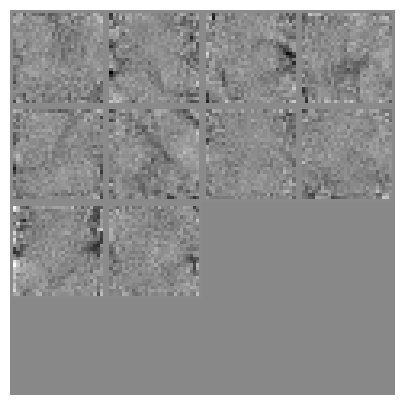

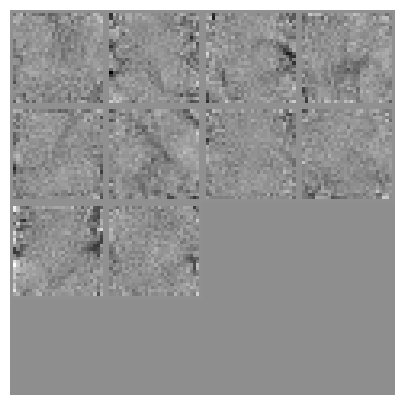

KeyboardInterrupt: 

In [65]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [66]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [67]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [68]:
import torchvision
from torch.nn.functional import *

In [69]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5) #normalizes x and mean and standard deviation are set to .5
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5) #normalizes xtest and mean and standard deviation are set to .5

In [70]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1))) #2D convolution layer with ReLU activation and weight 0
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1))) #2D convolution layer with ReLU activation and weight 1
    x = x.view(x.size(0), 6272) #reshapes the tensor from 4D to 2D
    x = linear(x,w[2]) #linear connection using weight 2
    return x

In [71]:
def Decoder(x,w):
    x = linear(x,w[3]) #linear transformation to the input tensor
    x = x.view(x.size(0), 128, 7, 7)  #reshapes the tensor from 2D to 4D
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1))) #2D convolution layer with ReLU activation and weight 4
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1))) #2D transposed convolution layer with ReLU activation and weight 5
    return x

In [72]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w) #reconstructs the data back to its original dimension

In [73]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [74]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [75]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [76]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps): #optimizer with the specified parameters and learning rate

    x_real,y = get_batch('train') #batch of real data and corresponding labels

    x_fake = Autoencoder(x_real,w) #make fake data by passing the real data through the autoencoder

    loss = torch.mean((x_fake - x_real)**2) #loss as the mean squared error

    optimizer.zero_grad() #reset gradients to zero
    loss.backward() #backpropagation to compute gradients of the loss
    optimizer.step() #update based on computed gradients

    if i % 100 == 0: print(loss.item())

1.4768575429916382
0.30636081099510193
0.257815957069397
0.24104401469230652
0.22763675451278687
0.22105072438716888
0.21088950335979462
0.20682798326015472
0.20593538880348206
0.2006060630083084


In [77]:
image_batch,y = get_batch('test')

In [78]:
image_batch_recon = Autoencoder(image_batch,w)

In [79]:
torch.mean((image_batch_recon - image_batch)**2)

tensor(0.2243, device='cuda:0', grad_fn=<MeanBackward0>)

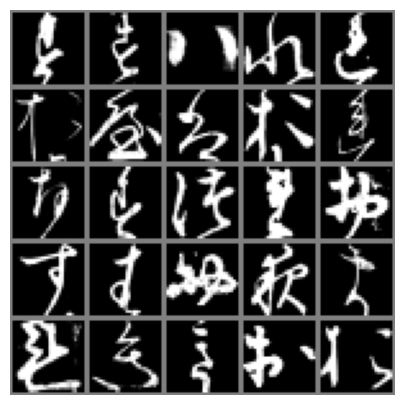

In [80]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

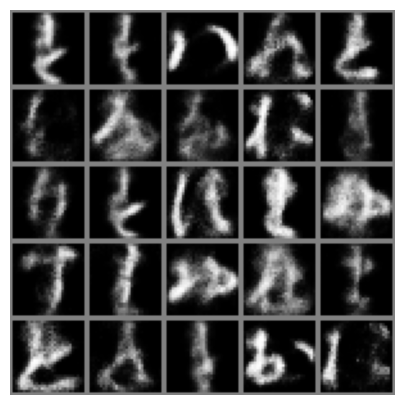

In [81]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



In [82]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024

In [83]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 16302282.01it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269755.58it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5026620.11it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3615585.56it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [84]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5 #range between -1 and 1
X_test = (X_test - 0.5)/0.5 #range between -1 and 1

In [85]:
n = 7

index = np.where(Y == n) #finds indices where y=n
X = X[index] #use index to filter x array
index = np.where(Y_test == n) #finds indices where ytest=n
X_test = X_test[index] #use index to filter xtest array

In [86]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [87]:
###################################################

In [88]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [89]:
x,y = get_batch('train')

In [90]:
x.shape

torch.Size([1024, 1, 28, 28])

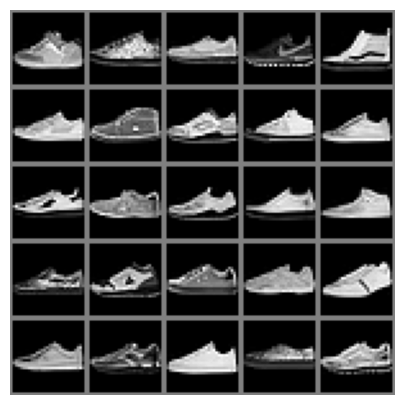

In [91]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [92]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [93]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x) #transforms into range between 0 and 1
    return x

In [94]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [95]:
b = 1024

In [96]:
batch_size = b

In [97]:
batch_size

1024

In [98]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

In [99]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [100]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

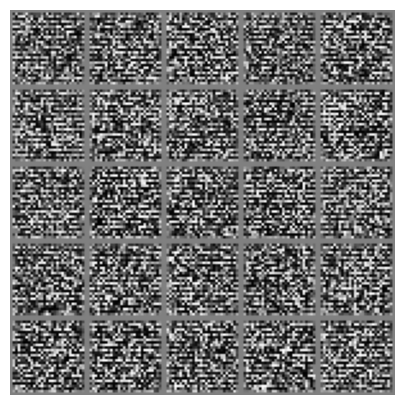

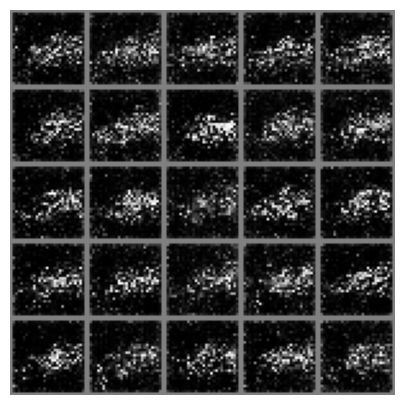

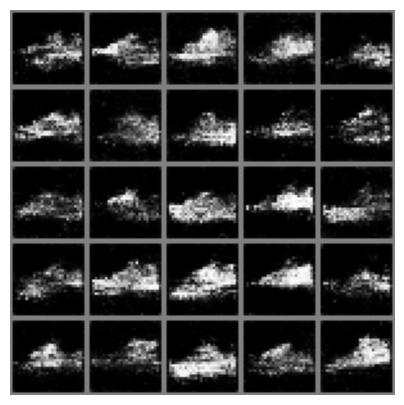

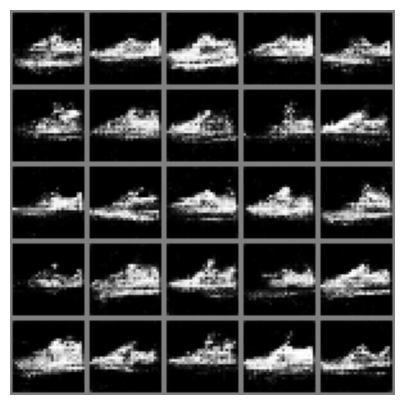

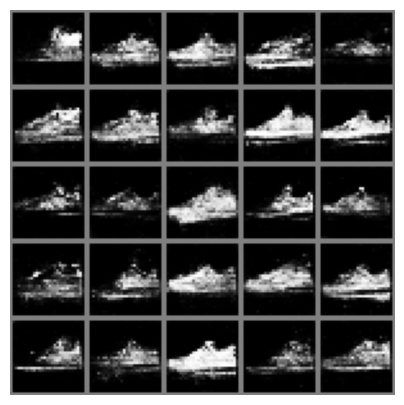

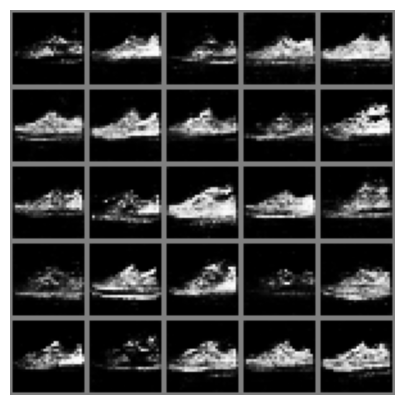

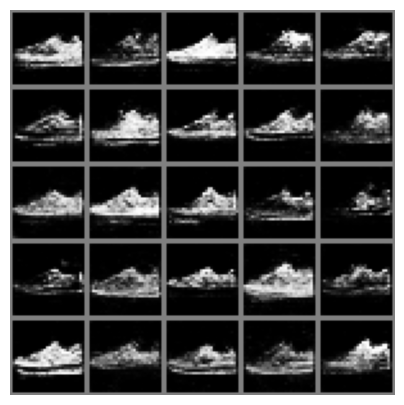

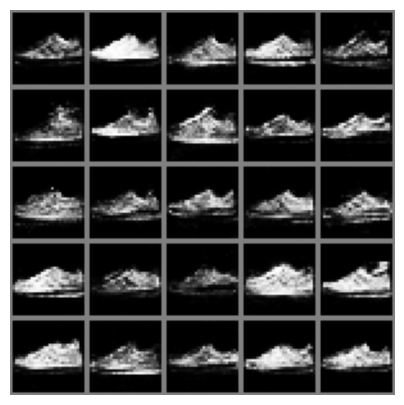

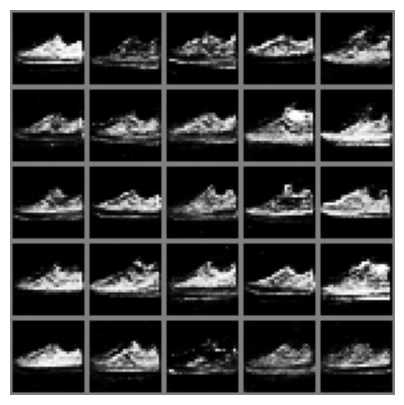

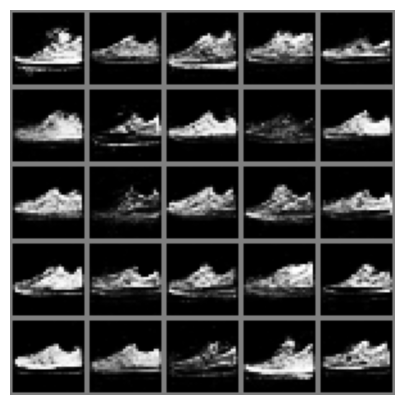

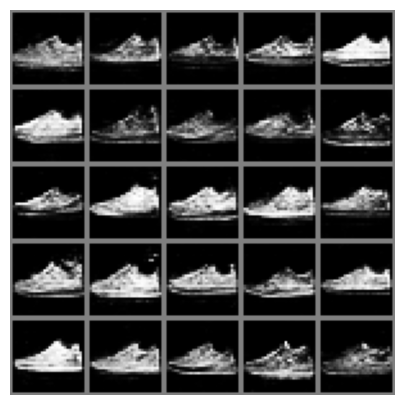

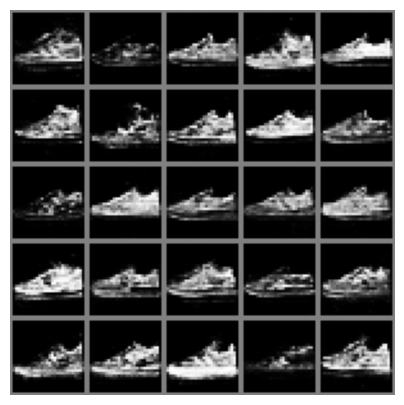

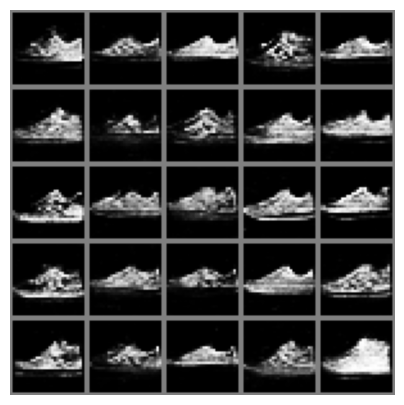

In [101]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels) #discriminator's loss for real and fake images
    d_optimizer.zero_grad() #reset gradients
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels) #generators loss
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])  #generate and plot images to monitor progress

In [102]:
z1[np.random.randint(steps)].shape

torch.Size([1024, 64])

In [103]:
noise = GPU_data(torch.randn(1,64))

<ipython-input-19-951240ba67ce>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [104]:
output = G(noise,w)

In [105]:
output.shape

torch.Size([1, 1, 28, 28])

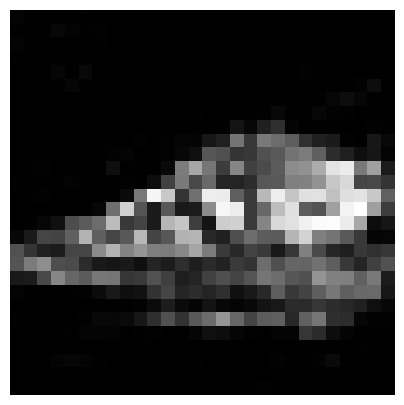

In [106]:
plot(output[0,0])